11468800/11490434 [============================>.] - ETA: 0s

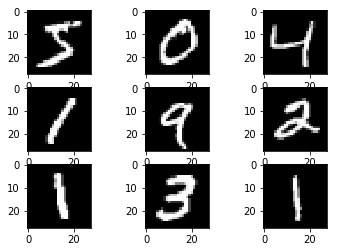

In [24]:
# Plot of images as baseline for comparison 
from keras.datasets import mnist 
from matplotlib import pyplot 
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# create a grid of 3x3 images 
for i in range(0, 9): 
    pyplot.subplot(330 + 1 + i) 
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [25]:
#MLP
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
8s - loss: 0.2795 - acc: 0.9209 - val_loss: 0.1417 - val_acc: 0.9571
Epoch 2/10
7s - loss: 0.1119 - acc: 0.9675 - val_loss: 0.0921 - val_acc: 0.9711
Epoch 3/10
7s - loss: 0.0715 - acc: 0.9797 - val_loss: 0.0783 - val_acc: 0.9774
Epoch 4/10
7s - loss: 0.0503 - acc: 0.9859 - val_loss: 0.0755 - val_acc: 0.9767
Epoch 5/10
7s - loss: 0.0374 - acc: 0.9891 - val_loss: 0.0683 - val_acc: 0.9786
Epoch 6/10
7s - loss: 0.0268 - acc: 0.9927 - val_loss: 0.0632 - val_acc: 0.9803
Epoch 7/10
7s - loss: 0.0207 - acc: 0.9947 - val_loss: 0.0621 - val_acc: 0.9810
Epoch 8/10
7s - loss: 0.0137 - acc: 0.9971 - val_loss: 0.0618 - val_acc: 0.9805
Epoch 9/10
7s - loss: 0.0110 - acc: 0.9978 - val_loss: 0.0582 - val_acc: 0.9809
Epoch 10/10
7s - loss: 0.0082 - acc: 0.9983 - val_loss: 0.0583 - val_acc: 0.9813
Baseline Error: 1.87%


In [26]:
# Simple CNN 
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# fix dimension ordering issue
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 121s - loss: 0.2310 - acc: 0.9346 - val_loss: 0.0822 - val_acc: 0.9743
Epoch 2/10
60000/60000 [==============================] - 120s - loss: 0.0738 - acc: 0.9780 - val_loss: 0.0466 - val_acc: 0.9843
Epoch 3/10
60000/60000 [==============================] - 120s - loss: 0.0532 - acc: 0.9838 - val_loss: 0.0433 - val_acc: 0.9855
Epoch 4/10
60000/60000 [==============================] - 121s - loss: 0.0404 - acc: 0.9877 - val_loss: 0.0403 - val_acc: 0.9871
Epoch 5/10
60000/60000 [==============================] - 120s - loss: 0.0337 - acc: 0.9895 - val_loss: 0.0341 - val_acc: 0.9882
Epoch 6/10
60000/60000 [==============================] - 120s - loss: 0.0277 - acc: 0.9915 - val_loss: 0.0305 - val_acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 119s - loss: 0.0232 - acc: 0.9927 - val_loss: 0.0357 - val_acc: 0.9881
Epoch 8/10
60000/60000 [=======================

In [27]:
# Larger CNN 
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 131s - loss: 0.3920 - acc: 0.8796 - val_loss: 0.0988 - val_acc: 0.9679
Epoch 2/10
60000/60000 [==============================] - 130s - loss: 0.0954 - acc: 0.9706 - val_loss: 0.0568 - val_acc: 0.9810
Epoch 3/10
60000/60000 [==============================] - 130s - loss: 0.0692 - acc: 0.9792 - val_loss: 0.0385 - val_acc: 0.9882
Epoch 4/10
60000/60000 [==============================] - 130s - loss: 0.0563 - acc: 0.9826 - val_loss: 0.0321 - val_acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 133s - loss: 0.0475 - acc: 0.9854 - val_loss: 0.0305 - val_acc: 0.9901
Epoch 6/10
60000/60000 [==============================] - 131s - loss: 0.0436 - acc: 0.9861 - val_loss: 0.0286 - val_acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 131s - loss: 0.0382 - acc: 0.9877 - val_loss: 0.0265 - val_acc: 0.9907
Epoch 8/10
60000/60000 [=======================

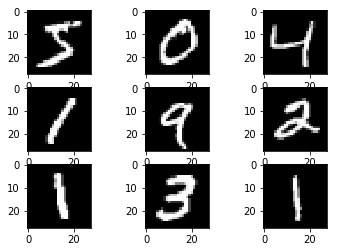

In [29]:
#SVM
import matplotlib.pyplot as plt
from keras.datasets import mnist 
from matplotlib import pyplot 
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# create a grid of 3x3 images 
for i in range(0, 9): 
    pyplot.subplot(330 + 1 + i) 
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()
#from sklearn.datasets import load_digits
#digits = load_digits()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [30]:
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


In [31]:
from sklearn.svm import LinearSVC

In [32]:
svm = LinearSVC()

In [33]:
svm.fit(X_train, y_train);

In [34]:
svm.predict(X_train)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [35]:
svm.score(X_train, y_train)

0.92626666666666668

In [36]:
svm.score(X_test, y_test)

0.91849999999999998

In [37]:
import numpy as np
from sklearn.cross_validation import cross_val_score
scores =  cross_val_score(svm, X_train, y_train, cv=5)
print("scores: %s  mean: %f  std: %f" % (str(scores), np.mean(scores), np.std(scores)))

scores: [ 0.91436901  0.90843193  0.90766667  0.9050596   0.91988996]  mean: 0.911083  std: 0.005354
